In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

from env import get_db_url
import wrangle as wr
import explore as ex
import model as mo
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures
α = .05

# Exploration & Visualization

## Key Questions:

>- Is there a significant relationship between bedrooms and home value?
>- Is there a significant relationship between bathrooms and home value?
>- Is there a significant relationship between lot size and home value?
>- Is there a significant relationship between square footage and home value?
>- Is there a significant relationship between year built and home value?

In [2]:
df = wr.get_zillow_data()
df.head()

,bedrooms,bathrooms,sq_ft,tax_value,year_built,lot_size,LA,orange,ventura
0,4,3.5,3100,1023282,1998,4506,0,1,0
1,2,1.0,1465,464000,1967,12647,0,0,1
2,3,2.0,1243,564778,1962,8432,0,1,0
3,4,3.0,2376,145143,1970,13038,1,0,0
4,4,3.0,2962,773303,1950,63000,1,0,0


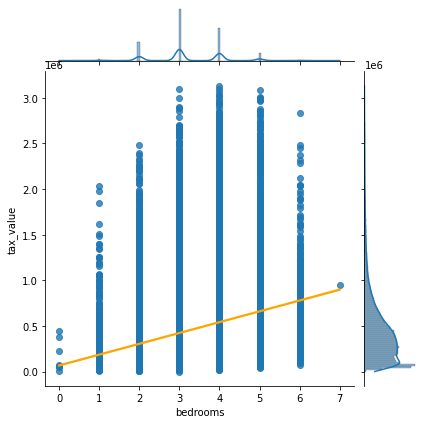

In [3]:
ex.joint('bedrooms', 'tax_value', df)

In [4]:
#Running a Pearson's R test to check the correlation between square footage and a home's value:
corr, p = stats.pearsonr(df.bedrooms, df.tax_value)

#Running a significance test to determine whether we can reject the null:
ex.significance_test(p)
print(f'The correlation coefficient for bedrooms and value is {round(corr, 2)}.')

Sufficient evidence -> Reject the null hypothesis.
The correlation coefficient for bedrooms and value is 0.26.


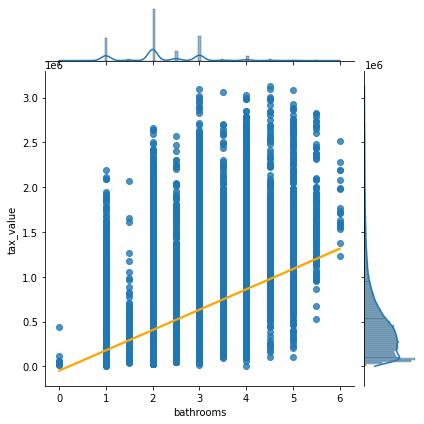

In [5]:
ex.joint('bathrooms', 'tax_value', df)

In [6]:
#Running a Pearson's R test to check the correlation between square footage and a home's value:
corr, p = stats.pearsonr(df.bathrooms, df.tax_value)

#Running a significance test to determine whether we can reject the null:
ex.significance_test(p)
print(f'The correlation coefficient for bathrooms and value is {round(corr, 2)}.')

Sufficient evidence -> Reject the null hypothesis.
The correlation coefficient for bathrooms and value is 0.5.


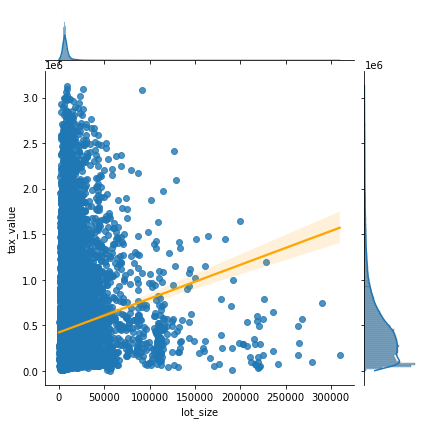

In [7]:
ex.joint('lot_size', 'tax_value', df)

In [8]:
#Running a Pearson's R test to check the correlation between square footage and a home's value:
corr, p = stats.pearsonr(df.lot_size, df.tax_value)

#Running a significance test to determine whether we can reject the null:
ex.significance_test(p)
print(f'The correlation coefficient for lot size and value is {round(corr, 2)}.')

Sufficient evidence -> Reject the null hypothesis.
The correlation coefficient for lot size and value is 0.11.


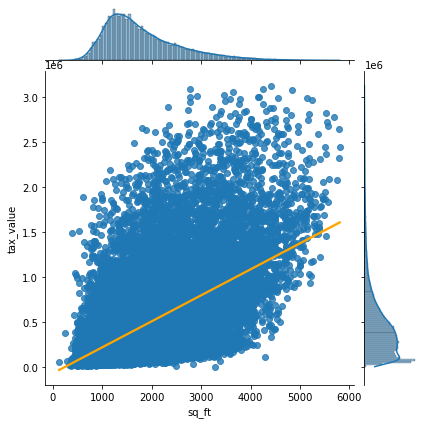

In [9]:
ex.joint('sq_ft', 'tax_value', df)

In [10]:
#Running a Pearson's R test to check the correlation between square footage and a home's value:
corr, p = stats.pearsonr(df.sq_ft, df.tax_value)

#Running a significance test to determine whether we can reject the null:
ex.significance_test(p)
print(f'The correlation coefficient for square footage and value is {round(corr, 2)}.')

Sufficient evidence -> Reject the null hypothesis.
The correlation coefficient for square footage and value is 0.58.


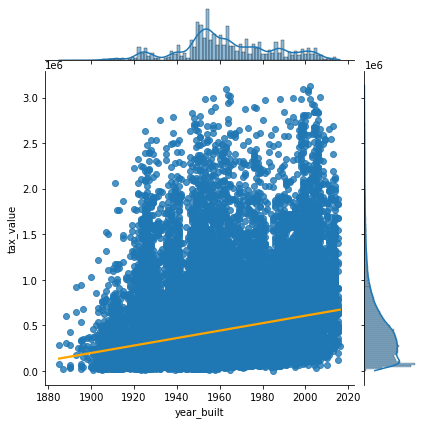

In [11]:
ex.joint('year_built', 'tax_value', df)

In [12]:
#Running a Pearson's R test to check the correlation between square footage and a home's value:
corr, p = stats.pearsonr(df.year_built, df.tax_value)

#Running a significance test to determine whether we can reject the null:
ex.significance_test(p)
print(f'The correlation coefficient for year built and value is {round(corr, 2)}.')

Sufficient evidence -> Reject the null hypothesis.
The correlation coefficient for year built and value is 0.24.


## Key takeaway

### there is significant correlation with:
    
   | Feature | Correlation |
   |--|--|
   | Square feet | 0.58 |
   | Bathrooms | 0.50 |
   | Bedrooms | 0.26 |
   | Year Built | 0.24 |
   | Lot Size | 0.11